# Brain Tumor Classification

## 1. Import libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Load dataset


Link data:
https://www.kaggle.com/datasets/jakeshbohaju/brain-tumor/data

In [ ]:
df=pd.read_csv('/content/bt_dataset_t3.csv')

## 3. Data exploration

In [ ]:
df.head()

,Image,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
0,Image1,23.448517,2538.985627,50.388348,0.651174,1.984202,5.421042,181.467713,0.781557,0.610831,0.847033,2.765411,0.968576,7.458341e-155,97.974630,0.777011,0.171163,0.303989,1
1,Image2,4.398331,834.853030,28.893823,0.953532,6.495203,43.349355,76.745886,0.972770,0.946281,0.980762,0.548605,0.959751,7.458341e-155,110.346597,0.977953,0.009913,0.839019,1
2,Image3,3.244263,642.059166,25.338886,0.966065,7.772860,61.756034,81.752406,0.980161,0.960715,0.985066,0.540411,0.944259,7.458341e-155,112.266298,0.985362,0.006372,0.849775,1
3,Image4,8.511353,1126.214187,33.559115,0.868765,3.763142,15.107579,362.291213,0.921786,0.849690,0.949295,2.765725,0.859027,7.458341e-155,101.955792,0.881015,0.068437,0.000000,0
4,Image5,21.000793,2235.316978,47.279139,0.684724,1.936029,4.722343,312.439226,0.804184,0.646711,0.880301,3.006660,0.938572,7.458341e-155,97.639870,0.766308,0.184878,0.000000,0


In [ ]:
# Thông tin về dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644 entries, 0 to 1643
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               1644 non-null   object 
 1   Mean                1644 non-null   float64
 2   Variance            1644 non-null   float64
 3   Standard Deviation  1644 non-null   float64
 4   Entropy             1644 non-null   float64
 5   Skewness            1275 non-null   float64
 6   Kurtosis            1275 non-null   float64
 7   Contrast            1644 non-null   float64
 8   Energy              1644 non-null   float64
 9   ASM                 1644 non-null   float64
 10  Homogeneity         1644 non-null   float64
 11  Dissimilarity       1644 non-null   float64
 12  Correlation         1644 non-null   float64
 13  Coarseness          1644 non-null   float64
 14  PSNR                1644 non-null   float64
 15  SSIM                1275 non-null   float64
 16  MSE   

In [ ]:
# Thống kê mô tả của dữ liệu
df.describe()

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
count,1644.000000,1644.000000,1644.000000,1644.000000,1275.000000,1275.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1.644000e+03,1644.000000,1275.000000,1644.000000,1546.000000,1644.000000
mean,3.125191,377.214252,14.206369,0.949141,16.996439,742.215017,58.206011,0.968980,0.942412,0.979727,0.546093,0.895361,7.458341e-155,inf,0.939480,0.036449,0.320465,0.881387
std,5.359059,548.174013,13.247645,0.094175,21.247054,2934.685940,76.370330,0.059090,0.105063,0.036854,0.779876,0.115596,0.000000e+00,NaN,0.066399,0.051187,0.312112,0.323431
min,0.000000,0.000000,0.000000,0.530684,1.219356,2.502720,0.000000,0.695889,0.484262,0.811102,0.000000,-0.000035,7.458341e-155,53.378482,0.675997,0.000000,0.000000,0.000000
25%,0.037800,6.030021,2.455609,0.951339,5.437071,30.567200,4.189331,0.971472,0.943758,0.980386,0.029637,0.856232,7.458341e-155,62.394514,0.936873,0.007639,0.000000,1.000000
50%,0.798752,123.306079,11.104325,0.988411,9.377379,88.954857,32.275087,0.993253,0.986552,0.995027,0.249390,0.925825,7.458341e-155,65.822770,0.961182,0.020226,0.247692,1.000000
75%,3.584896,548.029238,23.409950,0.999407,20.319678,415.828216,80.164627,0.999656,0.999311,0.999712,0.679472,0.972652,7.458341e-155,72.015149,0.977311,0.041185,0.599091,1.000000
max,31.031021,3345.853590,57.843354,1.000000,255.994850,65534.242200,743.368131,1.000000,1.000000,1.000000,5.604428,1.000000,7.458341e-155,inf,0.999253,0.298698,0.957969,1.000000


## 4. Data preparation

#### Loại bỏ các feature không liên quan

In [ ]:
# Image lưu các hình ảnh của não. Trong bài phân loại này sẽ ko dùng hình ảnh nên sẽ loại bỏ
df=df.drop(['Image'],axis=1)
# Coarseness là độ sắc nét của hình ảnh trong feature Image
df=df.drop(['Coarseness'],axis=1)

#### Missing Values

In [ ]:
df.isnull().sum()

Mean                    0
Variance                0
Standard Deviation      0
Entropy                 0
Skewness              369
Kurtosis              369
Contrast                0
Energy                  0
ASM                     0
Homogeneity             0
Dissimilarity           0
Correlation             0
PSNR                    0
SSIM                  369
MSE                     0
DC                     98
Target                  0
dtype: int64

In [ ]:
# thay các missing value trong mỗi feature bằng mean feature đó
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(df.mean())

In [ ]:
df.isnull().sum()

Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
PSNR                  0
SSIM                  0
MSE                   0
DC                    0
Target                0
dtype: int64

## 5. Data visualization

#### Correlation Heatmap

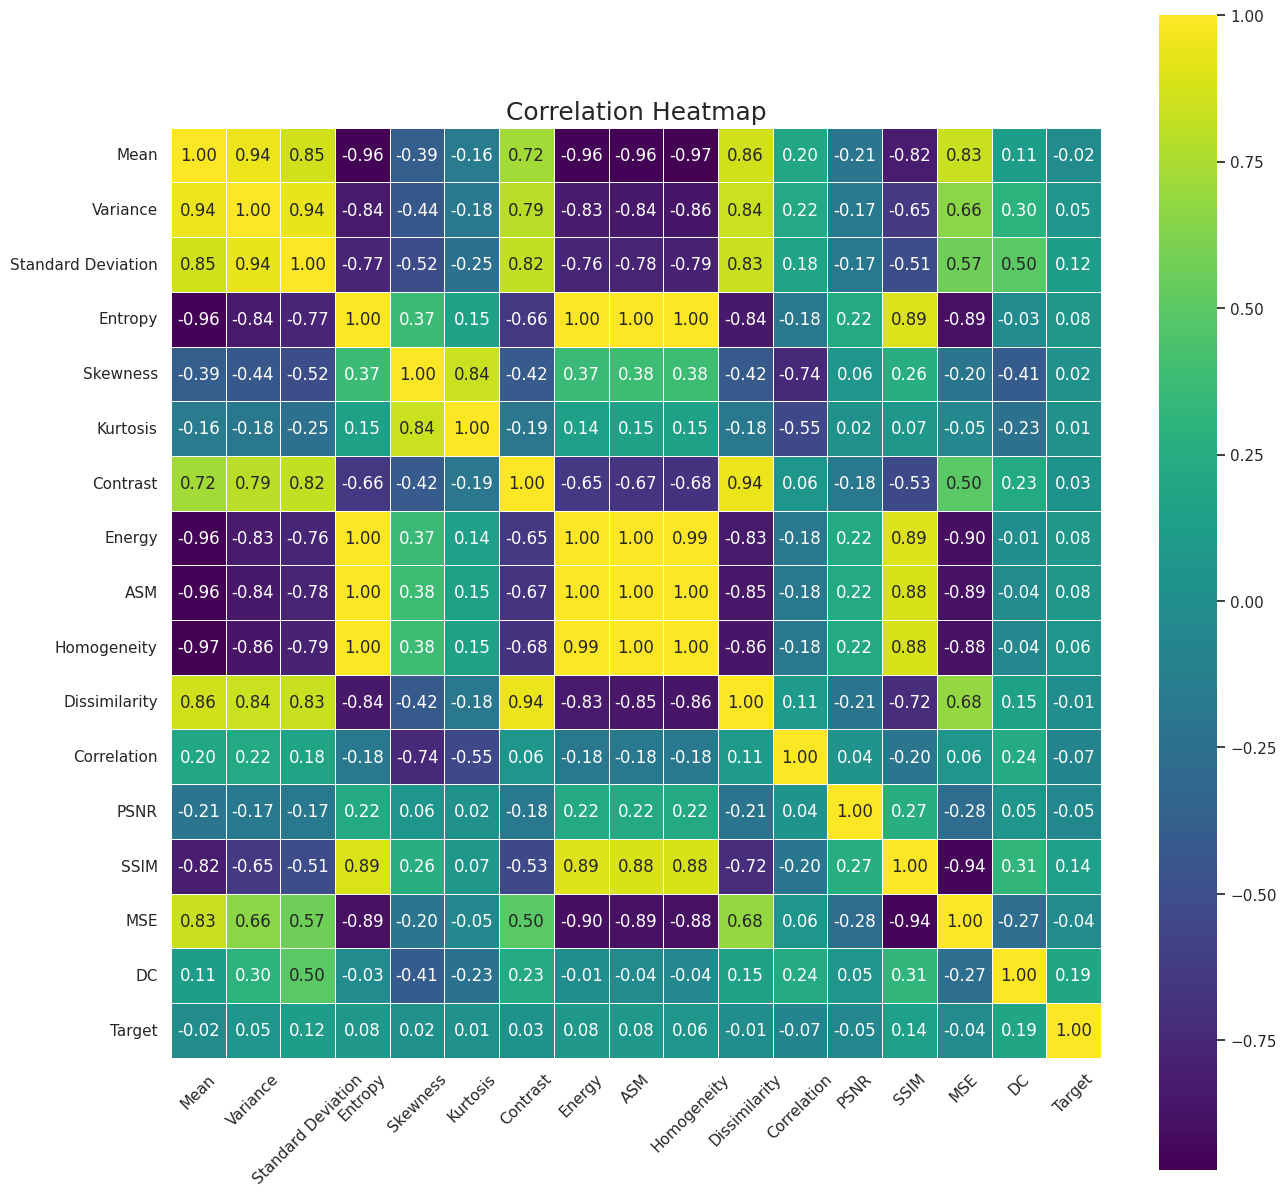

In [ ]:
# Tính giá trị tương quan
plt.figure(figsize=(15, 15))

correlation_matrix = df.corr()

sns.set(font_scale=1)

sns.set_style("whitegrid")

sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, square=True)

plt.title("Correlation Heatmap", fontsize=18)
plt.xticks(rotation=45)

plt.show()

## 6. Data splitting

#### Tạo features và target

In [ ]:
X=df.drop(['Target'],axis=1)
y=df['Target']

#### Tách dữ liệu thành tập test và train

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

## 7. Model buiding


#### Xây dựng SVC Model cơ bản

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC

In [ ]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.89      1.00      0.94       293

    accuracy                           0.89       329
   macro avg       0.45      0.50      0.47       329
weighted avg       0.79      0.89      0.84       329



**Nhận xét:** Sau khi dùng SVC default thì thấy độ chính xác của mô hình là 0.89

#### Xây dựng SVC với RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

params =[{'C': uniform(loc=0.01, scale=1000),
         'kernel': ['sigmoid','rbf'],
         'gamma': uniform(loc=0.001, scale=10)}
]

randomSCV = RandomizedSearchCV(estimator=SVC(),
                    param_distributions=params,
                    verbose=3,
                    refit = True,
                    cv = 5)

randomSCV.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=974.4023907993342, gamma=7.6775104652582495, kernel=rbf;, score=0.943 total time=   0.2s
[CV 2/5] END C=974.4023907993342, gamma=7.6775104652582495, kernel=rbf;, score=0.951 total time=   0.2s
[CV 3/5] END C=974.4023907993342, gamma=7.6775104652582495, kernel=rbf;, score=0.939 total time=   0.2s
[CV 4/5] END C=974.4023907993342, gamma=7.6775104652582495, kernel=rbf;, score=0.935 total time=   0.1s
[CV 5/5] END C=974.4023907993342, gamma=7.6775104652582495, kernel=rbf;, score=0.935 total time=   0.2s
[CV 1/5] END C=465.5062129977645, gamma=2.3663412327784927, kernel=sigmoid;, score=0.882 total time=   0.0s
[CV 2/5] END C=465.5062129977645, gamma=2.3663412327784927, kernel=sigmoid;, score=0.878 total time=   0.0s
[CV 3/5] END C=465.5062129977645, gamma=2.3663412327784927, kernel=sigmoid;, score=0.878 total time=   0.0s
[CV 4/5] END C=465.5062129977645, gamma=2.3663412327784927, kernel=sigmoid;, score=0.878 total 

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x79fae2b0f0a0>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x79fadfd3ace0>,
                                         'kernel': ['sigmoid', 'rbf']}],
                   verbose=3)

In [ ]:
print(randomSCV.best_params_)

print(randomSCV.best_estimator_)

{'C': 974.4023907993342, 'gamma': 7.6775104652582495, 'kernel': 'rbf'}
SVC(C=974.4023907993342, gamma=7.6775104652582495)


In [ ]:
random_pred = randomSCV.predict(X_test)

print(classification_report(y_test, random_pred))


              precision    recall  f1-score   support

           0       1.00      0.47      0.64        36
           1       0.94      1.00      0.97       293

    accuracy                           0.94       329
   macro avg       0.97      0.74      0.81       329
weighted avg       0.95      0.94      0.93       329



**Nhận xét:**
- Độ chính xác (Accuracy): Trước khi tối ưu hóa, mô hình có độ chính xác là 0.89, sau đó tăng lên 0.94 sau khi tối ưu hóa. Điều này cho thấy mô hình sau khi được điều chỉnh tham số hoạt động tốt hơn.
- Precision: Sau khi tối ưu hóa, precision cho lớp 0 đã tăng lên 1.00, cho thấy mô hình có khả năng dự đoán chính xác tất cả các trường hợp thuộc lớp 0.
- Recall: Sau khi tối ưu hóa, recall cho lớp 0 đã tăng lên 0.47, cho thấy mô hình có khả năng phát hiện nhiều hơn các trường hợp thuộc lớp 0.
- F1-score của cả hai lớp 0 và 1 đều tăng sau khi tối ưu hóa, cho thấy sự cải thiện trong cả precision và recall.

Mô hình sau khi tối ưu hóa đã cải thiện đáng kể về khả năng dự đoán đúng và phát hiện các trường hợp, đặc biệt là đối với lớp 0





#### Xây dựng SVC với GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['sigmoid','rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.882 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.878 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.878 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.878 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.878 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.932 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.943 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.924 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.924 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.924 total time=   0.1s
[CV 1/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.882 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.1, kernel=sigmoid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['sigmoid', 'rbf']},
             verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


In [ ]:
grid_pred = grid.predict(X_test)

print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64        36
           1       0.94      1.00      0.97       293

    accuracy                           0.94       329
   macro avg       0.97      0.74      0.81       329
weighted avg       0.95      0.94      0.93       329



**Nhận xét:** Sau khi dùng một cách khác là GridSearchCV thì thấy độ chính xác không khác biệt so với RandomizedSearchCV dù cho khác best_prams. Điều này cho thấy sử dụng GridSearchCV cũng có hiệu quả khi so sánh với SVC nhưng cũng không có khác biệt với RandomizedSearchCV dù số lần train là nhiều hơn

#### Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:

steps = [('scaler', StandardScaler()),('pca',PCA()),('clf',SVC(kernel='rbf'))]
parameters = {
    'pca__n_components' :[2,3,4],
    'clf__C':[0.001,0.1,0.01,1,10,100,10e5],
    'clf__gamma':[1,0.1,0.01,0.001]
}
pipeline = Pipeline(steps)

pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()), ('clf', SVC())])

In [ ]:
cv=5
grid = GridSearchCV(pipeline,param_grid=parameters,cv=cv)
grid.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('clf', SVC())]),
             param_grid={'clf__C': [0.001, 0.1, 0.01, 1, 10, 100, 1000000.0],
                         'clf__gamma': [1, 0.1, 0.01, 0.001],
                         'pca__n_components': [2, 3, 4]})

In [ ]:
print(grid.best_params_)

print(grid.best_estimator_)

{'clf__C': 100, 'clf__gamma': 0.1, 'pca__n_components': 4}
Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=4)),
                ('clf', SVC(C=100, gamma=0.1))])


In [ ]:
grid_predictions = grid.predict(X_test)

print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75        36
           1       0.96      0.99      0.97       293

    accuracy                           0.95       329
   macro avg       0.91      0.83      0.86       329
weighted avg       0.95      0.95      0.95       329



Nhận xét: Việc sử dụng tiền xử lý bao gồm chuẩn hóa dữ liệu (StandardScaler) và giảm chiều dữ liệu (PCA) đã giúp cải thiện độ chính xác của mô hình.
- Độ chính xác (Accuracy): Kết quả độ chính xác sau khi sử dụng Pipeline là 0.95, trong khi trước đó độ chính xác là 0.94.
- Precision và Recall: Precision và recall đối với cả hai lớp 0 và 1 đều có cải thiện so với trường hợp trước khi sử dụng Pipeline. Điều này thể hiện rằng mô hình sau khi tiền xử lý dữ liệu có khả năng dự đoán đúng (precision) và phát hiện (recall) tốt hơn.
- F1-Score: F1-score cho cả hai lớp 0 và 1 đều có sự cải thiện. Điều này cho thấy rằng việc sử dụng PCA để giảm chiều dữ liệu có thể đã loại bỏ các chi tiết không cần thiết và làm cho mô hình dự đoán hiệu quả hơn.